In [2]:
#2.2 Problem Statement Pandas

# Problem Statement 1:

# 1.1. How-to-count-distance-to-the-previous-zero
# For each value, count the difference of the distance from the previous zero (or the start
# of the Series, whichever is closer) and if there are no previous zeros, print the position

# Consider a DataFrame df where there is an integer column {'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}
# The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'.
# import pandas as pd
# df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

import pandas as pd
df=pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
S=pd.Series([7, 2, 0, 3, 4, 2, 5, 0, 3, 4])

# Converting the series into boolean using 'eq()' so '0' & '1' are assigned to each value
# Using 'cumsum' to get cumulative sum and then masking the original zeros using 'mask'
# Taking cumulative count of the values using 'cumcount' and adding 1 to each element
# Masking the original zeros again using 'eq() and repalcing with 0

Results=(S.groupby(S.eq(0).cumsum().mask(S.eq(0))).cumcount()+1).mask(S.eq(0),0)
pd.DataFrame((Results),columns=['Y'])

,Y
0,1
1,2
2,0
3,1
4,2
5,3
6,4
7,0
8,1
9,2


In [3]:
# 1.2. Create a DatetimeIndex that contains each business day of 2015
# and use it to index a Series of random numbers.

# Here is the function

import numpy as np
import pandas as pd
dates=pd.date_range('2015-01-01','2015-12-31')
s=pd.Series(np.random.rand(dates.shape[0]),index=dates)
print(s)

2015-01-01    0.757991
2015-01-02    0.383908
2015-01-03    0.348741
2015-01-04    0.371442
2015-01-05    0.465927
2015-01-06    0.577027
2015-01-07    0.316665
2015-01-08    0.477183
2015-01-09    0.394783
2015-01-10    0.998322
2015-01-11    0.914755
2015-01-12    0.210454
2015-01-13    0.717723
2015-01-14    0.112760
2015-01-15    0.295156
2015-01-16    0.423271
2015-01-17    0.541176
2015-01-18    0.899035
2015-01-19    0.566111
2015-01-20    0.100378
2015-01-21    0.124031
2015-01-22    0.912866
2015-01-23    0.550835
2015-01-24    0.458090
2015-01-25    0.955233
2015-01-26    0.629520
2015-01-27    0.474805
2015-01-28    0.286538
2015-01-29    0.349315
2015-01-30    0.480620
                ...   
2015-12-02    0.363660
2015-12-03    0.924896
2015-12-04    0.957553
2015-12-05    0.242524
2015-12-06    0.056715
2015-12-07    0.771285
2015-12-08    0.287889
2015-12-09    0.321189
2015-12-10    0.581704
2015-12-11    0.172380
2015-12-12    0.084632
2015-12-13    0.532718
2015-12-14 

In [4]:
# 1.3. Find the sum of the values in s for every Wednesday

# The value of Wednesday would be 2 when the values are assinged to each day of the week
# i.e., Monday=0 to Sunday=6
# Restricting the decimal values from S to only 2 digit

print('The sum of all Wednesdays is - ',round(s[s.index.dayofweek==2].sum(),2))

The sum of all Wednesdays is -  23.65


In [5]:
# 1.4. Average For each calendar month

# Define list of months
# Calculate monthly average using 'groupby'
# Index the average for months

months=['Jan-15','Feb-15','Mar-15','Apr-15','May-15','Jun-15','Jul-15','Aug-15','Sep-15','Oct-15','Nov-15','Dec-15']
monthly_average=s.groupby(s.index.month).mean()
monthly_average.index=months
print('Average for each calendar month of 2015:\n',monthly_average)

Average for each calendar month of 2015:
 Jan-15    0.489024
Feb-15    0.577854
Mar-15    0.486143
Apr-15    0.475700
May-15    0.536881
Jun-15    0.446646
Jul-15    0.492104
Aug-15    0.509489
Sep-15    0.468979
Oct-15    0.420434
Nov-15    0.539099
Dec-15    0.505565
dtype: float64


In [24]:
# 1.5. For each group of four consecutive calendar months in s, find the date
# on which the highest value occurred.

# Here are the steps to follow:
# Create a list of four consecutive months using 'for' loop with the list 'months' that we created ealier
# Identify eliments with maximum value in a group of four consecutive months
# Use 'range' 1,10 as there are 9 such groups
# Create a series using the dates with maximum value indexed with 'Four_consecutive_months' list

Four_consecutive_months = [months[i] + "-" + months[i+3] for i in range(9)]
maximum_date_values = [(s[(s.index.month >= i) & (s.index.month <= (i+3))]).idxmax() for i in range(1,10)
maximum_date_series = pd.Series(maximum_date_values, index = Four_consecutive_months)
print('Dates in the year 2015 that have highest random values -\n',maximum_date_series)

SyntaxError: invalid syntax (<ipython-input-24-bf974d3b87e0>, line 12)

In [8]:
# Problem Statement 2:

# 2.1. Read the dataset from the below link
# https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [22]:
#2.2.2.1 Delete unnamed columns

df.drop([df.columns.str.contains('Unnamed', case = True)], axis = 1, inplace=False)
df.head()

KeyError: '[(True, False, False, False, False, False, False)] not found in axis'

In [23]:
# 2.2 Show the distribution of male and female

np.round((df['Gender'].value_counts())/len(df)*100,2)

F    54.98
M    45.02
Name: Gender, dtype: float64

In [14]:
# 2.3 Show the top 5 most preferred names

# Group the values basis name, count and take sum by sorting in discending order
# Common five names in the data set

df.groupby('Name')['Count'].sum().sort_values(ascending=False).head(5)

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
Name: Count, dtype: int64

In [15]:
# 2.4  What is the median name occurrence in the dataset

# Find the median using 'Id' and then populate the corresponding name

print('The median name from the data set is: ')
df[df['Id'] == df.median()['Id']]['Name']

The median name from the data set is: 


508197    Kasey
Name: Name, dtype: object

In [16]:
# 2.5 Distribution of male and female born count by states

# Group the data by state and gender

df.groupby(['State','Gender'])['Count'].sum()

State  Gender
AK     F           26250
       M           37399
AL     F          215308
       M          260114
AR     F          129712
       M          162947
AZ     F          368567
       M          439691
CA     F         2414063
       M         2670584
CO     F          260805
       M          313425
CT     F          141350
       M          171397
DC     F           35276
       M           47228
DE     F           31312
       M           41748
FL     F          915422
       M         1060957
GA     F          549637
       M          635531
HI     F           37279
       M           53127
IA     F          144764
       M          174009
ID     F           72808
       M           94320
IL     F          695312
       M          791679
                  ...   
OK     F          184967
       M          228613
OR     F          172111
       M          209445
PA     F          593382
       M          682709
RI     F           35560
       M           47939
SC     F   

********Distribution of male and female by states********


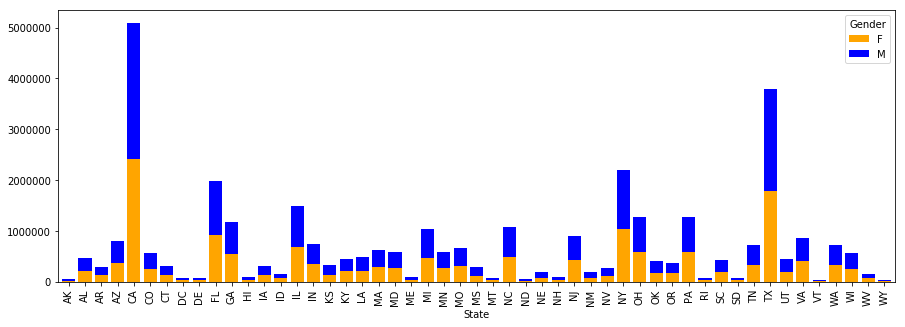

In [17]:
# Representing above data in a graph

graph = df.groupby(['State','Gender'])['Count'].sum()
print('********Distribution of male and female by states********')
graph.unstack().plot(kind='bar',width=0.8,stacked=True, color=['Orange','Blue'], grid=False,figsize=(15,5))